In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)
    
Data_list = []
increasing_segments = []
Increasing_V2 = []
    

In [3]:
Increasing_V2 = []



for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows=3)
    time = Data[:, 0]
    V1 = Data[:, 1]  # Assuming V1 is in the second column
    V2 = Data[:, 2]  # Assuming V2 is in the third column
    
    # Manually specified indices
    a = 5270  # Specify the start index
    b = 8909  # Specify the end index
    c = b-1500
    d = 11000 
    # Collect data between indices a and b
    time_segment = time[a:b+1]
    V1_segment = V1[a:b+1]
    V2_segment = V2[a:b+1]
    
    time_neg = time[c:d]
    V1_Neg_segment = V1[c:d]
    V2_Neg_segment = V2[c:d]
    
    
    # Check if this segment index matches any of the desired indices
    if i in [0, 3, 7, 21, 30, 33, 37, 51]:
        Increasing_V2.append((time_segment, V1_segment, V2_segment))



c_light = const.c
eps0 = const.epsilon_0
a = (1/4)*c_light*eps0
b = (2*np.pi)/(633e-9) 

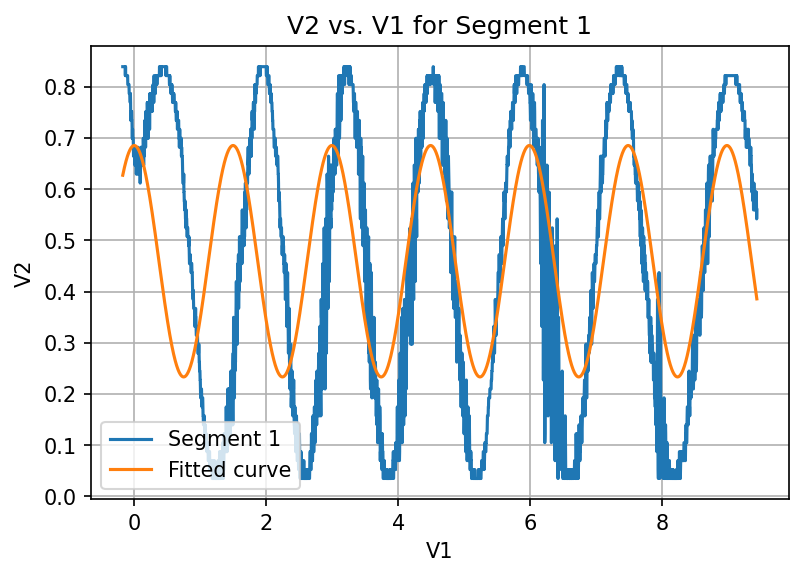

Fitted Parameters:
Amplitude: 0.2259588421861569 +/- 0.005568304010457344
k: 2.1139421890282663e-07 +/- 2.2738222794829885e-10
Offset: 0.4592369034800809 +/- 0.0039468032015857486



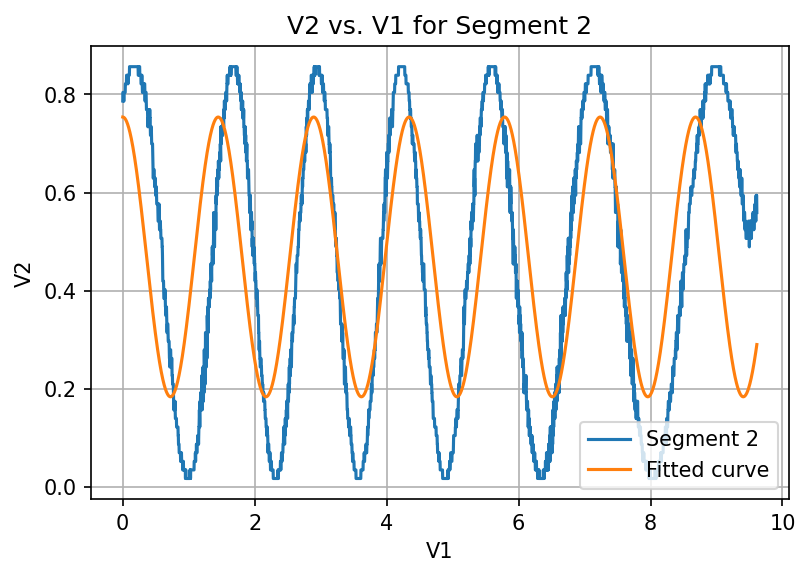

Fitted Parameters:
Amplitude: 0.285002881354833 +/- 0.005049242181826689
k: 2.187296671666075e-07 +/- 1.6470169769089524e-10
Offset: 0.46896985215511977 +/- 0.003593658056065739



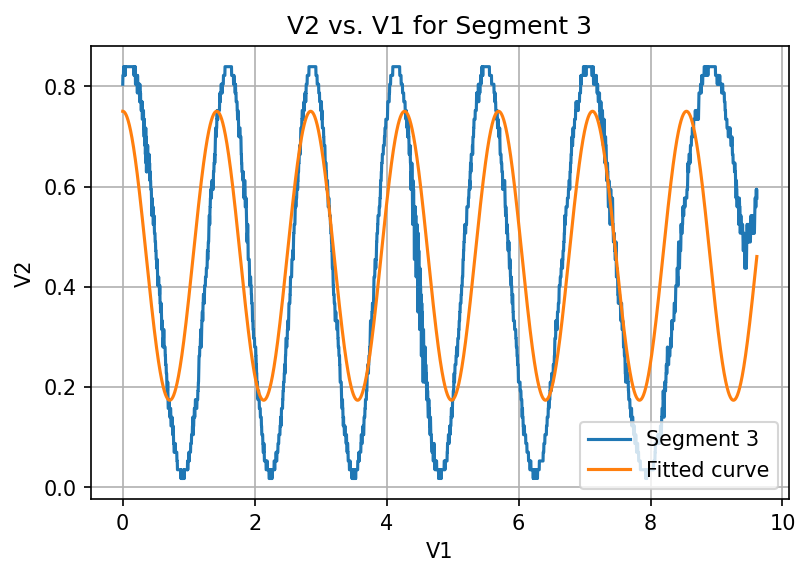

Fitted Parameters:
Amplitude: 0.2882617045852753 +/- 0.004754969022403987
k: 2.2225116735594682e-07 +/- 1.4959315586923175e-10
Offset: 0.46188121280111255 +/- 0.003361792123366027



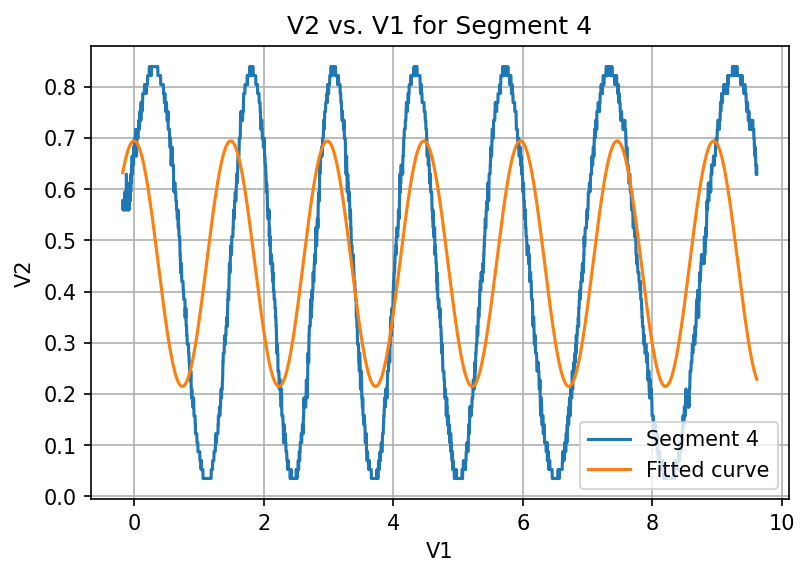

Fitted Parameters:
Amplitude: 0.23969888378916349 +/- 0.005358673234179852
k: 2.1224941319238707e-07 +/- 2.0316589278114606e-10
Offset: 0.45442368619498363 +/- 0.0038032775699900017

Overall Standard Deviation:
Amplitude: 0.005182797112216968
k: 1.8621074357239298e-10
Offset: 0.003676382737751879


In [4]:
amplitude_guess = 1.2
k_guess = 21.5e-8
offset_guess = 0.4
p0 = [amplitude_guess, k_guess, offset_guess]

frequency = (2*np.pi)/(633e-9)
def Intensity_fit(v, *p): 
    amplitude = p[0]
    k = p[1]
    offset = p[2]
    return amplitude *(np.cos(frequency*2*k*v)) + offset

# Placeholder to store standard deviations
perr_all = []

# Plot V2 vs. V1 and V1_segment vs. time_segment for each segment of increasing V2 on individual plots
for i, segment in enumerate(Increasing_V2):
    time_segment, V1_segment, V2_segment = segment
    
    V2_help = np.linspace(min(V2_segment), max(V2_segment), len(V1_segment))
    # Perform curve fitting
    popt, pcov = sp.curve_fit(Intensity_fit, V2_help, V1_segment, p0=p0)

    # Calculate the standard deviations of the fitted parameters
    perr = np.sqrt(np.diag(pcov))
    perr_all.append(perr)
    
    # Plot V2 vs. V1
    plt.plot(V2_help, V1_segment, '-', label=f'Segment {i+1}')
    plt.plot(V2_help, Intensity_fit(V2_help, *popt), '-', label='Fitted curve')
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.title(f'V2 vs. V1 for Segment {i+1}')
    plt.legend()
    plt.grid()
    plt.show()
    
    print("Fitted Parameters:")
    print("Amplitude:", popt[0], "+/-", perr[0])
    print("k:", popt[1], "+/-", perr[1])
    print("Offset:", popt[2], "+/-", perr[2])
    print()

# Print overall standard deviation
print("Overall Standard Deviation:")
print("Amplitude:", np.mean(perr_all, axis=0)[0])
print("k:", np.mean(perr_all, axis=0)[1])
print("Offset:", np.mean(perr_all, axis=0)[2])



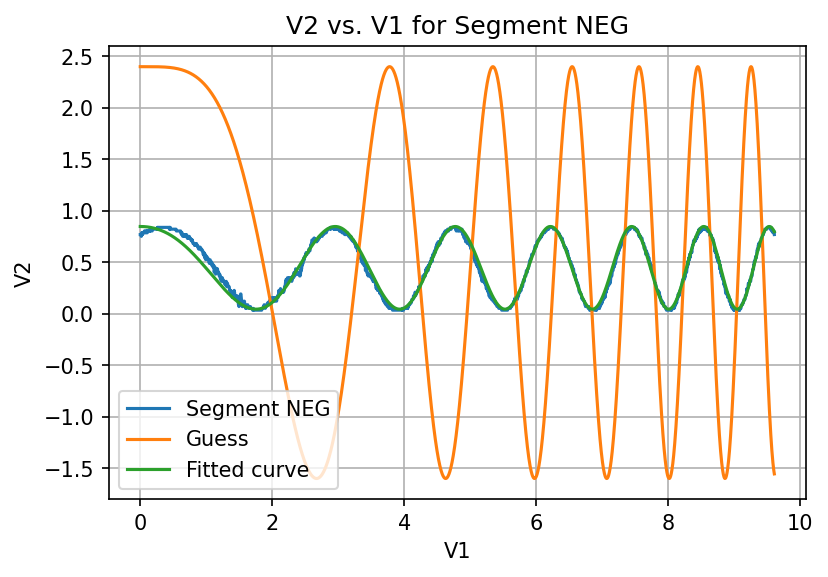

Fitted Parameters:
Amplitude: 0.40151954779662946 +/- 0.00096497248535859
k: 1.3269249521606543e-08 +/- 1.1384046514848666e-11
Offset: 0.4461400877385512 +/- 0.0006883175468039057
n: 6.22732688664457e-08 +/- 8.410418288717226e-11


In [5]:
amplitude_guess = 2
k_guess = 21e-9
offset_guess = 0.4
n_guess = 0
p0_NEG = [amplitude_guess, k_guess, offset_guess, n_guess]

frequency = (2*np.pi)/(600e-9)

def Intensity_Quad_fit(v, *p): 
    amplitude = p[0]
    k = p[1]
    offset = p[2]
    n = p[3]
    return amplitude *(np.cos(frequency*2*(k*v**2+n*v))) + offset

V2_Neg_help = np.linspace(min(V2_Neg_segment), max(V2_Neg_segment), len(V1_Neg_segment))

# Perform curve fitting
popt_NEG, pcov_NEG = sp.curve_fit(Intensity_Quad_fit, V2_Neg_help, V1_Neg_segment, p0=p0_NEG)

# Calculate the standard deviations of the fitted parameters
perr_NEG = np.sqrt(np.diag(pcov_NEG))

# Plot V2 vs. V1
plt.plot(V2_Neg_help, V1_Neg_segment, '-', label=f'Segment NEG')
plt.plot(V2_Neg_help, Intensity_Quad_fit(V2_Neg_help, *p0_NEG), label='Guess')
plt.plot(V2_Neg_help, Intensity_Quad_fit(V2_Neg_help, *popt_NEG), '-', label='Fitted curve')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('V2 vs. V1 for Segment NEG')
plt.legend()
plt.grid()
plt.show()

# Print fitted parameters and their standard deviations
print("Fitted Parameters:")
print("Amplitude:", popt_NEG[0], "+/-", perr_NEG[0])
print("k:", popt_NEG[1], "+/-", perr_NEG[1])
print("Offset:", popt_NEG[2], "+/-", perr_NEG[2])
print("n:", popt_NEG[3], "+/-", perr_NEG[3])

In [6]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import display

labelsize = 12 # Labelsize should be 7 in the end

# Universal layout for figures. Can be changed for the specific graph.
# plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
# plt.rc("text", usetex = False) # Not sure, what this does
plt.rc('axes', labelsize = labelsize, titlesize = labelsize) 
plt.rc('xtick', labelsize = labelsize, top = True, direction = 'in')
plt.rc('ytick', labelsize = labelsize, right = True, direction = 'in')
plt.rc('legend', fontsize = labelsize)
plt.rc('lines', linewidth = 0.5)
cm = 1/2.54
capsize = 1.2
alpha = 0.3

wavelength = 632.8 *10**-9 # wavelength of He-Ne laser

def theoretical_intensity(x, *p): # Defining theoreticla model
    A = p[0]
    w = p[1]
    n = p[2]
    c = p[3]
    I = A*np.cos(w * x + n) + c
    return I

A_guess = 0.3 # Defining guesses
w_guess = 0.2
n_guess = 0
c_guess = 4.3

p_init = [A_guess, w_guess, n_guess, c_guess]


files = [] # Preparing for importing data
times = []
channel_A = []
channel_B = []

print('Importing data')

for i in range(11): # Importing data - range 11
    j = i + 1
    path = fr'c:\Users\jakob\Desktop\Eksperimentiel fysik 2\Øvelse 2\Michelson interferometer filer\Michelson interferometer filer_{j}.txt'
    file = np.genfromtxt(path, delimiter = '\t', skip_header = 2)
    files.append(file)
    
    time = file[:, 0]
    A = file[:, 1]
    B = file[:, 2]
    times.append(time)
    channel_A.append(A)
    channel_B.append(B)

print('Data succesfully imported') # Informing the user, that the data has succesfully imported

def figure(time, A, B): # Defining how to plot the raw data
    fig, ax = plt.subplots()
    ax.plot(time, A, color = 'tab:blue', label = 'data')
    ax.plot(time, B, color = 'green', label = 'Frequency generator')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (V)')
    ax.legend()

figures = [] # Potentially plotting the raw data
for time, A, B in zip(times, channel_A, channel_B):
    figures.append(figure(time, A, B))

plt.show()

def fitting(file_number, lower_limit, upper_limit, guess = p_init): # Defineing how fitting in a certain interval is done 
    mask = [t >= lower_limit and t <= upper_limit for t in times[file_number]]
    time = times[file_number][mask]
    A = channel_A[file_number][mask]
    B = 10*channel_B[file_number][mask]

    N = 250

    xs = np.linspace(min(B), max(B), N)
    ys_guess = theoretical_intensity(xs, *guess)
    p_opt, p_cov = curve_fit(theoretical_intensity, B, A, p0 = guess)

    ys_fit = theoretical_intensity(xs, *p_opt)

    fig, ax = plt.subplots()
    ax.plot(B, A, label = 'data', color = 'tab:blue')
    ax.plot(xs, ys_fit, label = 'fit', color = 'k')
    ax.plot(xs, ys_guess, label = 'guess', color = 'g')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (V)')
    ax.set_title(f'Fitting for {file_number + 1}')
    ax.legend()
    ax.grid(alpha = alpha)

    return p_opt, p_cov


ps_opt = [[], [], [], []] # Preparing for fitting
ps_cov = []
ps_cov2 = [[], [], [], []]


# Finding the files and time stamps that can be used

# file_numbers = [1, 2, 5, 6, 6, 7, 8, 9, 9, 10, 11] # List of good files with their respective intervals
#                                                     # 2nd 6 can be removed - 1st 6 is rather bad. maybe use another guess
# lower_limits = [1.8, 4.2, 4.5, 0, 5.8, 6.4, 5.5, 0.8, 6, 3.2, 4]
# upper_limits = [3.7, 6.5, 7.2, 2.3, 7.5, 9.8, 7.8, 3.3, 8.5, 6, 7.2]

# file_numbers = [1, 2, 5, 6, 7, 8, 9, 9, 10, 11] # List of good files with their respective intervals
#                                                     # 2nd 6 can be removed - 1st 6 is rather bad. maybe use another guess
# lower_limits = [1.8, 4.2, 4.5, 5.8, 6.4, 5.5, 0.8, 6, 3.2, 4]
# upper_limits = [3.7, 6.5, 7.2, 7.5, 9.8, 7.8, 3.3, 8.5, 6, 7.2]

true_file_numbers = [1, 5, 6, 6, 7, 8, 9, 9, 10, 11] # List of good files with their respective intervals
                                                    # 2nd 6 can be removed - 1st 6 is rather bad. maybe use another guess
true_lower_limits = [1.8, 4.5, 0, 5.8, 6.4, 5.5, 0.8, 6, 3.2, 4]
true_upper_limits = [3.7, 7.2, 2.3, 7.5, 9.8, 7.8, 3.3, 8.5, 6, 7.2]
file_numbers = []
lower_limits = []
upper_limits = []
for i in range(len(true_file_numbers)):
    file_numbers += [true_file_numbers[i], true_file_numbers[i]]
    lower_limits += [true_lower_limits[i], (true_lower_limits[i] + true_upper_limits[i])/2 - 0.2]
    upper_limits += [(true_lower_limits[i] + true_upper_limits[i])/2 + 0.2, true_upper_limits[i] ]
    
for i in range(len(true_file_numbers)):
    file_numbers += [true_file_numbers[i]]
    lower_limits += [(true_lower_limits[i] + true_upper_limits[i])/2 - 0.2]
    upper_limits += [true_upper_limits[i] ]

print('Fitting begins')

for file, lim_1, lim_2 in zip(file_numbers, lower_limits, upper_limits): # Fitting
    i = file - 1
    p_opt, p_cov = fitting(i, lim_1, lim_2)
    for j in range(4):
        ps_opt[j].append(p_opt[j])
        ps_cov2[j].append(np.sqrt(p_cov[j][j]))
    ps_cov.append(p_cov)


print('Fitting was succesfull') # Informing the user that the fitting did not encounter any major issues.

plt.show() # Potentially plotting the fits

for i in range(3): # Potentially printing the raw fitting parameter's values
    print(i, ':')
    print(ps_opt[i])
    print('')



for i, A in enumerate(ps_opt[0]): # Cleaning up the fitting parameter, so the amplitudes are positive
    if A < 0:
        ps_opt[0][i] = -A # Correcting the amplitude
        ps_opt[2][i] += np.pi # Correcting the phase shift
    else:
        pass


if any([n > 2*np.pi for n in ps_opt[2]]): # Cleaning up the fitting parameter, so the phaseshifts are between -pi and pi
    m = max(max(np.array(ps_opt[2])/np.pi), abs(min(np.array(ps_opt[2])/np.pi))) # Times of necessary corrections
    print('Times of necessary corrections:', int(m))
    for _ in range(int(m)): 
        for i, n in enumerate(ps_opt[2]):
            if n > np.pi: # Correcting the phase if too high - Change this to upper limit if it is not pi (e.g. 2 pi) 
                ps_opt[2][i] -= 2*np.pi
            elif n < -np.pi: # Correcting the phase if too low - Change this to lower limit if it is not -pi (e.g. 0)
                ps_opt[2][i] += 2*np.pi
            else:
                pass
            

print('')
print('')


def average(parameter, err):
    w = 1/np.array(err)**2
    
    value = np.sum(np.array(parameter) * w)
    total_err = np.sum(w)
    
    mean = value/total_err
    error = 1/np.sqrt(np.sum(w))
    return mean, error


means = []
errors = []
for i in range(len(ps_opt)):
    print('Optimal parameter number:', i)
    mean, err = average(ps_opt[i], ps_cov2[i])
    print(np.round(ps_opt[i], 10))
    print('Mean:', mean)
    print('Uncertainty: ', err)
    print('')
    means.append(mean)
    errors.append(err)

c = wavelength/(2*np.pi)
print('Final value for expansion coefficient:', c * means[1])
print('Error of expansion coefficient: ', c * errors[1])
# Driving frequency around 5.69 Hz
# Driving voltage amplitude around 9.33 V

Importing data


FileNotFoundError: c:\Users\jakob\Desktop\Eksperimentiel fysik 2\Øvelse 2\Michelson interferometer filer\Michelson interferometer filer_1.txt not found.